In [1]:
import numpy as np
import numpy.random as rnd
import scipy.stats
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# Coin flipping: Prior
To represent our uncertainty before observing any data, let's choose a _uniform_ prior on $p_h$. This means we are equally uncertain about all possible values it can take.
\begin{align}
p_h &\sim \mathcal{U}(0, 1) \\
p(p_h) &= 1 && \text{for } 0 \leq x \leq 1
\end{align}

Text(0.5, 1.0, 'Prior probability density')

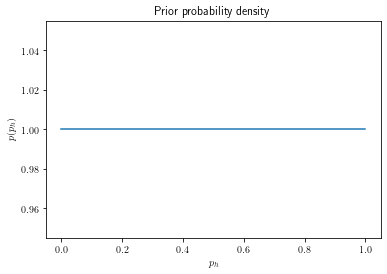

In [2]:
p = np.linspace(0, 1, 1000)
fig, ax = plt.subplots()
ax.plot(p, np.zeros(len(p)) + 1)
ax.set_xlabel("$p_h$")
ax.set_ylabel("$p(p_h)$")
ax.set_title("Prior probability density")

# Forwards probability: Simulating Datasets
- This is an *assumption* about what kind of datasets we expect to see.
- We can investigate this by *simulating* datasets.
- We see many runs of 1s or 0s even though $p_h$ is not 1 or 0!
- So if we see a run of 4 1s... What does this tell us about $p_h$?

In [3]:
N = 4
for sample in range(1, 10):
    p_h = rnd.rand()
    print(f"p_h: {p_h:.2f}")
    for sample_X in range(4):
        X = (rnd.rand(N) < p_h).astype('int')
        print(f"\t   N_i:   {X.sum()}, {len(X) - X.sum()}\t\t", X)

p_h: 0.20
	   N_i:   2, 2		 [1 0 0 1]
	   N_i:   0, 4		 [0 0 0 0]
	   N_i:   1, 3		 [1 0 0 0]
	   N_i:   1, 3		 [0 0 0 1]
p_h: 0.98
	   N_i:   4, 0		 [1 1 1 1]
	   N_i:   4, 0		 [1 1 1 1]
	   N_i:   4, 0		 [1 1 1 1]
	   N_i:   4, 0		 [1 1 1 1]
p_h: 0.99
	   N_i:   4, 0		 [1 1 1 1]
	   N_i:   4, 0		 [1 1 1 1]
	   N_i:   4, 0		 [1 1 1 1]
	   N_i:   4, 0		 [1 1 1 1]
p_h: 0.63
	   N_i:   3, 1		 [1 1 0 1]
	   N_i:   2, 2		 [0 1 1 0]
	   N_i:   3, 1		 [1 1 1 0]
	   N_i:   4, 0		 [1 1 1 1]
p_h: 0.60
	   N_i:   1, 3		 [1 0 0 0]
	   N_i:   3, 1		 [1 1 0 1]
	   N_i:   0, 4		 [0 0 0 0]
	   N_i:   1, 3		 [0 0 0 1]
p_h: 0.95
	   N_i:   4, 0		 [1 1 1 1]
	   N_i:   3, 1		 [1 1 1 0]
	   N_i:   4, 0		 [1 1 1 1]
	   N_i:   4, 0		 [1 1 1 1]
p_h: 0.11
	   N_i:   0, 4		 [0 0 0 0]
	   N_i:   2, 2		 [1 0 1 0]
	   N_i:   1, 3		 [1 0 0 0]
	   N_i:   0, 4		 [0 0 0 0]
p_h: 0.21
	   N_i:   3, 1		 [1 1 1 0]
	   N_i:   1, 3		 [1 0 0 0]
	   N_i:   0, 4		 [0 0 0 0]
	   N_i:   0, 4		 [0 0 0 0]
p_h: 0.67
	   N_i:   2, 

### It tells us: _Something_ but we are still uncertain!

# Inference: Reverse Probability
Main idea of Bayesian inference:
- Consider the unknown parameter *unobserved*
- Use conditional probability (Bayes rule) to quantify your uncertainty!
\begin{align}
p(p_h|\mathbf x) &= \frac{p(\mathbf x|p_h)p(p_h)}{p(\mathbf x)} \\
&= \frac{p_h^{N_1}(1-p_h)^{N_0}}{p(\mathbf x)} \\
p(\mathbf x) &= \int p_h^{N_1}(1-p_h)^{N_0} \mathrm d p_h = \frac{\Gamma(N_1 + 1)\Gamma(N_0 + 1)}{\Gamma(N_1 + N_0 + 2)}
\end{align}

This is an example of a Beta distribution.

In [4]:
normconst = lambda n1, n0: scipy.special.gamma(n1 + 1) * scipy.special.gamma(n0 + 1) / scipy.special.gamma(n1 + n0 + 2)
postdensity_ = lambda x, n1, n0: x**n1 * (1-x)**n0 / normconst(n1, n0)
postdensity = lambda x, n1, n0: scipy.stats.beta.pdf(x, n1+1, n0+1) 

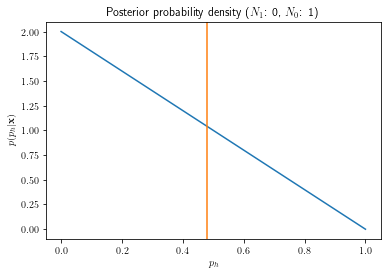

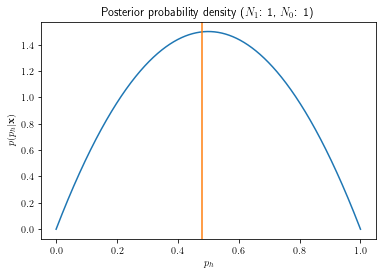

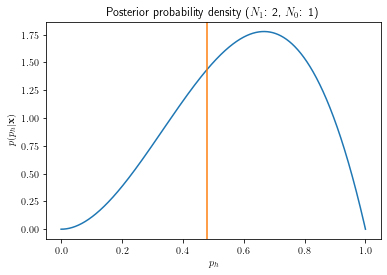

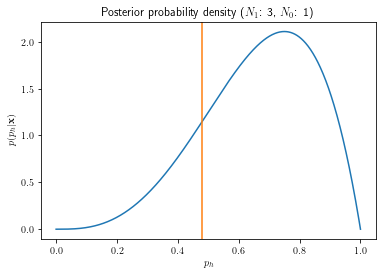

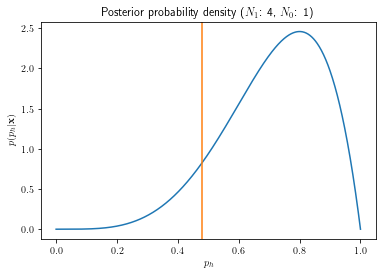

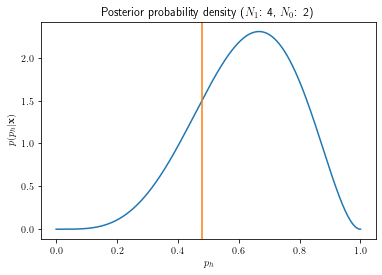

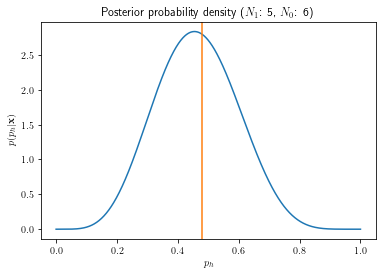

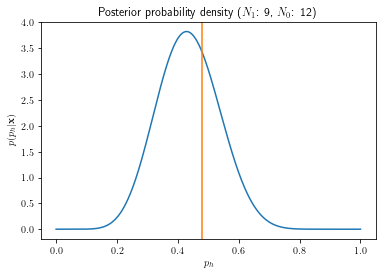

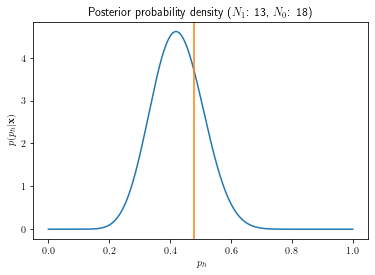

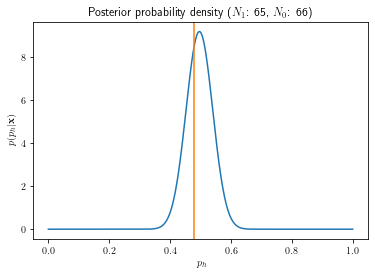

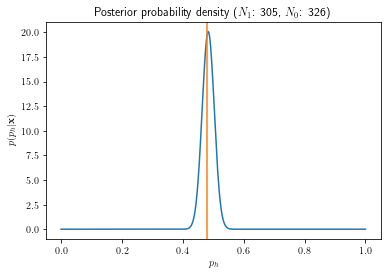

In [5]:
p_h = rnd.rand()
N_0, N_1 = 0, 0
for draws in [1, 1, 1, 1, 1, 1, 5, 10, 10, 100, 500]:
    X = rnd.rand(draws) < p_h
    N_1 = N_1 + X.sum()
    N_0 = N_0 + (1-X).sum()
    fig, ax = plt.subplots()
    ax.plot(p, postdensity(p, N_1, N_0))
    ax.set_xlabel("$p_h$")
    ax.set_ylabel("$p(p_h|\mathbf x)$")
    ax.set_title(f"Posterior probability density ($N_1$: {N_1}, $N_0$: {N_0})")
    ax.axvline(p_h, color='C1')

In [6]:
!jupyter nbconvert --to html l10p1-bayes-coin.ipynb

[NbConvertApp] Converting notebook l10p1-bayes-coin.ipynb to html
[NbConvertApp] Writing 761842 bytes to l10p1-bayes-coin.html
